## Chapter 03
#### DATA ANALYSIS TEXTBOOK
#### CH03 - Describe hotels-vienna
#### WHAT THIS CODES DOES:
#### Focus on histograms
#### v1.0 2020.05.20 J

## Import packages and core directory set

In [1]:
import pandas as pd
import seaborn as sns
from mizani.formatters import percent_format
import os
from plotnine import *
import numpy as np
import sys
import numpy as np

In [2]:
# Current script folder
current_path = os.getcwd()
dirname = "/".join(current_path.split("/")[:-2]) + "/"

# location folders
data_in = dirname + "da_data_repo/hotels-europe/clean/"
data_out = dirname + "da_case_studies/ch03-hotels-europe-compare/"
output = dirname + "da_case_studies/ch03-hotels-europe-compare/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)

In [3]:
# Import the prewritten helper functions 
from py_helper_functions import *

#### Load in clean and tidy data and create workfile

In [4]:
hotels_europe_price=pd.read_csv(data_in+"hotels-europe_price.csv")
hotels_europe_features=pd.read_csv(data_in+"hotels-europe_features.csv")

In [5]:
hotels_europe = pd.merge(hotels_europe_price,hotels_europe_features,how="left",on="hotel_id")
del hotels_europe_price
del hotels_europe_features

#### Filter for same Vienna data we used + London same date

In [6]:
hotels_europe_cut = (
    hotels_europe.query("year == 2017 and month == 11 and weekend == 0")
    .query('city in ["Vienna","London"]')
    .query('accommodation_type == "Hotel"')
    .query("stars>=3 and stars<=4")
    .query("stars.notna()")
    .query('city_actual in  ["Vienna", "London"]')
    .query("price <=600")
)

In [7]:
hotels_europe_cut.price.max()

491

In [8]:
(hotels_europe_cut
 .groupby("city")
 .agg(mean_price=('price', 'mean'),
      max= ('price','max'),
      n=('price','size'))
)

,mean_price,max,n
city,,,
London,202.356322,491,435
Vienna,109.975845,383,207


#### Vienna vs London
##### have same range on x axis

/home/jbiro/.local/lib/python3.8/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


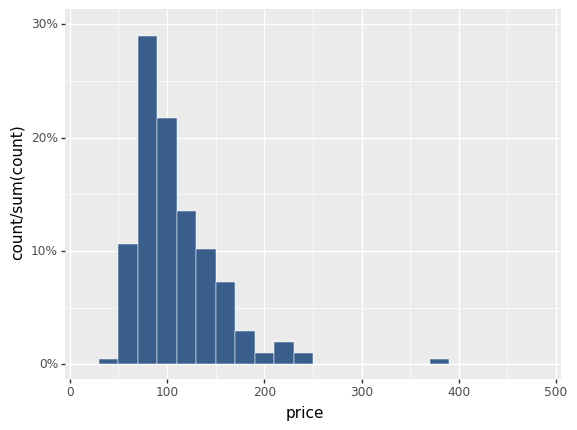

<ggplot: (8784920052143)>

In [9]:
# Vienna
ggplot(
    hotels_europe_cut.query('city=="Vienna"'),
    aes(x="price", y="stat(count)/sum(stat(count))"),
) + geom_histogram(
    binwidth=20, fill=color[0], color="#FFFFFF", size=0.2, alpha=0.8
) + scale_y_continuous(
    labels=percent_format(), expand=[0.01, 0.01], limits=[0, 0.3]
) + scale_x_continuous(
    expand=[0.01, 0.01], limits=[0, 500], breaks=list(range(0, 600, 100))
)

/home/jbiro/.local/lib/python3.8/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


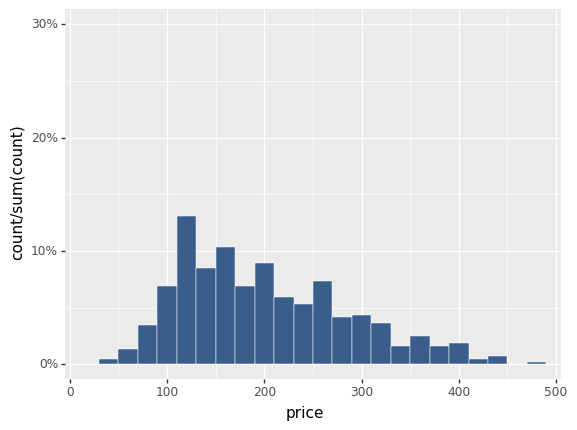

<ggplot: (8784920344697)>

In [10]:
# London
ggplot(
    hotels_europe_cut.query('city=="London"'),
    aes(x="price", y="stat(count)/sum(stat(count))"),
) + geom_histogram(
    binwidth=20, fill=color[0], color="#FFFFFF", size=0.2, alpha=0.8
) + scale_y_continuous(
    labels=percent_format(), expand=[0.01, 0.01], limits=[0, 0.3]
) + scale_x_continuous(
    expand=[0.01, 0.01], limits=[0, 500], breaks=list(range(0, 600, 100))
)

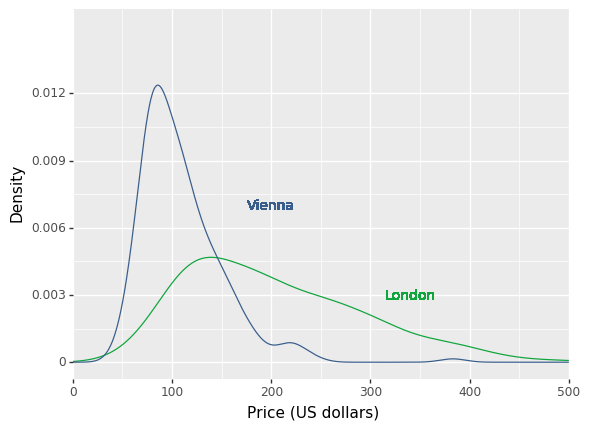

<ggplot: (8784920923950)>

In [11]:
ggplot(hotels_europe_cut, aes(x="price", y="stat(density)", color="city")) + geom_line(
    stat="density",show_legend='False'
) + labs(x="Price (US dollars)", y="Density", color="") + scale_color_manual(
    name="", values=[color[1], color[0]], labels=["London", "Vienna"]
) + scale_y_continuous(
    limits=[0, 0.015], breaks=seq(0, 0.015, 0.003)
) + scale_x_continuous(
    expand=[0.0, 0.0], limits=[0, 500], breaks=seq(0, 501, 100)
) + geom_text(
    aes(x=340, y=0.003, label=["London"]), color=color[1], size=10
) + geom_text(
    aes(x=200, y=0.007, label=["Vienna"]), color=color[0], size=10
)

#### Table 3.6

In [12]:
(
    hotels_europe_cut.groupby("city").agg(
        n=("price", "size"),
        mean=("price", np.mean),
        median=("price", np.median),
        min=("price", min),
        max=("price", max),
        sd=("price", np.std),
        skew=("price", skew),
    )
)

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3256: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,n,mean,median,min,max,sd,skew
city,,,,,,,
London,435,202.356322,186,49,491,88.128830,0.186
Vienna,207,109.975845,100,50,383,42.221381,0.237
